![CO2 emissions](co2.png)


The energy sector involves intricate experiments to improve efficiency and sustainability. Proper experimental design helps to maximize insights and minimize errors. There are two common types of experimental design: factorial designs, which study multiple independent variables within a single experiment, and randomized block designs, which group experimental units to control variance. Understanding when to use each design is crucial for energy-related studies.

An environmental research team is investigating the impact of various fuel sources on CO2 emissions across different geographical regions. The goal is to understand which assigned fuel source contributes the most to CO2 emissions and whether this varies depending on location. The team has collected data from four distinct geographical regions: North, South, East, and West. In each region, multiple fuel sources—Natural Gas, Biofuel, and Coal—are used to generate energy. The resulting CO2 emissions are measured to evaluate the environmental impact of each fuel source.

As the data scientist on this project, you have access to two datasets, each representing data from one of the two mentioned experimental designs. The aim is to determine whether a factorial design or a randomized block design was used for the given experimental setup above and to analyze the dataset to identify key patterns and insights.


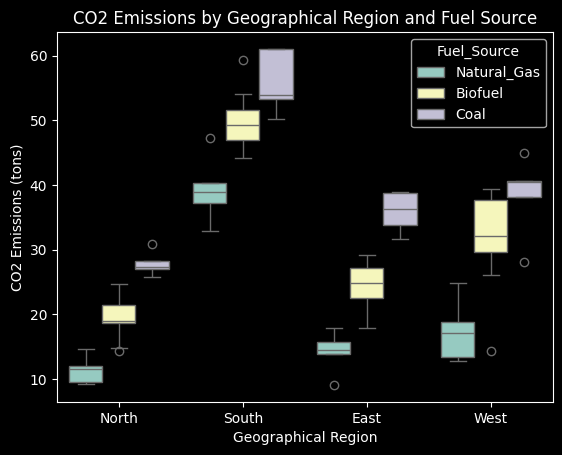

C:\Users\Username\AppData\Local\Temp\ipykernel_12128\1703200870.py:35: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  test_results = data.groupby("Geographical_Region").apply(


Test Results: Geographical_Region
East        (50.4975764792117, 7.046450528767478e-08)
North    (45.722317645356284, 1.4439335761931943e-07)
South       (15.29098339477534, 0.000158692177978578)
West      (12.949717442117826, 0.0003828048893388569)
dtype: object
Bonferroni Corrected P-values: [2.97842303e-03 1.60405848e-05 1.51381089e-03 1.95958890e-02
 1.04206412e-02 3.71506293e-01 1.17998627e-03 6.31245443e-05
 6.41264547e-04 2.69611996e-02 4.30884019e-03 1.00000000e+00]


In [2]:
# Start coding here (use as many cells as you need)

# Import required libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import f_oneway, ttest_ind
from statsmodels.sandbox.stats.multicomp import multipletests

# Load datasets
energy_design_a = pd.read_csv("energy_design_a.csv")
energy_design_b = pd.read_csv("energy_design_b.csv")

# Determine the correct experimental design by reviewing the columns available in both datasets
# There also appears to be some blocking by geographical region inferred
energy_design_a.head()
energy_design_b.head()
design = "randomized_block"  # Correct answer given the experimental setup

# Select the appropriate dataset
data = energy_design_b

# Create a boxplot to visualize CO2 emissions by geographical region and fuel source
sns.boxplot(x="Geographical_Region", y="CO2_Emissions", hue="Fuel_Source", data=data)
plt.title("CO2 Emissions by Geographical Region and Fuel Source")
plt.xlabel("Geographical Region")
plt.ylabel("CO2 Emissions (tons)")
plt.show()

# Identify highest median CO2 emission region and source after viewing the plot
highest_co2_region = "South"
highest_co2_source = "Coal"

# Group by Geographical Region and apply ANOVA to check significance
test_results = data.groupby("Geographical_Region").apply(
    lambda x: f_oneway(
        x[x["Fuel_Source"] == "Natural_Gas"]["CO2_Emissions"],
        x[x["Fuel_Source"] == "Biofuel"]["CO2_Emissions"],
        x[x["Fuel_Source"] == "Coal"]["CO2_Emissions"],
    )
)

print("Test Results:", test_results)

# Ensure test_results show significant results (one or more with p-value < 0.05)
if any(result.pvalue < 0.05 for result in test_results):
    bonferroni_p_values = []

    # Perform pairwise comparisons for Bonferroni correction
    for zone in ["North", "South", "East", "West"]:
        fuels = ["Natural_Gas", "Biofuel", "Coal"]
        comparisons = [
            (fuels[i], fuels[j])
            for i in range(len(fuels))
            for j in range(i + 1, len(fuels))
        ]

        for fuel1, fuel2 in comparisons:
            group1 = data[
                (data["Geographical_Region"] == zone) & (data["Fuel_Source"] == fuel1)
            ]["CO2_Emissions"]
            group2 = data[
                (data["Geographical_Region"] == zone) & (data["Fuel_Source"] == fuel2)
            ]["CO2_Emissions"]
            _, p_val = ttest_ind(group1, group2)
            bonferroni_p_values.append(p_val)

    # Apply Bonferroni correction for multiple comparisons
    diff_results = multipletests(bonferroni_p_values, alpha=0.05, method="bonferroni")

print("Bonferroni Corrected P-values:", diff_results[1])